In [ ]:
#https://mubaris.com/posts/movie-analysis/

# sentiment analysis with textblob at the movie's caption. use time interval 1 sec, find positive, negative, neutral sentiments for each video. Have a dictionary with: the title of caption, the intervals  , the sentiments, mean of positive, mean of negative

# Imports

In [33]:
import pysrt
from datetime import date, datetime, timedelta, time
import pysrt
from textblob import TextBlob
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
style.use('fivethirtyeight')
import os

import csv
import os
import os, re, sys
from stat import *

import numpy as np

# Handling srt Subtitles

In [2]:
# Helper Function to create equally divided time intervals
# start - Starting Time
# end - Ending Time
# delta - Interval Period
def create_intervals(start, end, delta):
    curr = start
    while curr <= end:
        curr = (datetime.combine(date.today(), curr) + delta).time()
        yield curr

In [3]:
# Main Function to Get Sentiment Data
# file - srt file location
# delta - time interval in minutes
def get_sentiment(file, delta=0.1):
    # Reading Subtitle
    subs = pysrt.open(file, encoding='iso-8859-1')
    n = len(subs)
    # List to store the time periods
    intervals = []
    # Start, End and Delta
    start = time(0, 0, 0)
    end = subs[-1].end.to_time()
    delta = timedelta(minutes=delta)
    for result in create_intervals(start, end, delta):
        intervals.append(result)
    # List to store sentiment polarity
    sentiments = []

    
    index = 0
    m = len(intervals)
    # Collect and combine all the text in each time interval
    for i in range(m):
        text = ""
        for j in range(index, n):
            # Finding all subtitle text in the each time interval
            if subs[j].end.to_time() < intervals[i]:
                text += subs[j].text_without_tags + " "
            else:
                break
        # Sentiment Analysis
       # print text
        blob = TextBlob(text)
        pol = blob.sentiment.polarity
      
        sentiments.append(pol)
        index = j
    # Adding Initial State
    intervals.insert(0, time(0, 0, 0))
    sentiments.insert(0, 0.0)
    return (intervals, sentiments)


In [4]:
# Utility to find average sentiment
def average(y):
    avg = float(sum(y))/len(y)
    return avg

In [103]:
#dict={captions, intervals, sentiments}
dict={}
i=0
def walktree(TopMostPath, callback):

    '''recursively descend the directory tree rooted at TopMostPath,
       calling the callback function for each regular file'''
    global dict
    for f in os.listdir(TopMostPath):
        pathname = os.path.join(TopMostPath, f)
        mode = os.stat(pathname)[ST_MODE]
        if S_ISDIR(mode):
            # It's a directory, recurse into it
            walktree(pathname, callback)
        elif S_ISREG(mode):
            # It's a file, call the callback function
            callback(pathname)
        else:
            # Unknown file type, print a message
            print 'Skipping %s' % pathname


def sentiment(file):
    
    global i 
    if '.srt' in file:
        x, y = get_sentiment(file)
        fig, ax = plt.subplots()
        plt.plot(x, y)
        plt.title(file, fontsize=32)
        plt.ylim((-1, 1))
        plt.ylabel("Sentiment Polarity")
        plt.xlabel("Running Time")
        plt.text(.5, 1.03, "Average Sentiment - " + str(round(average(y), 4)), color="green")
        dict[i]=((file,x,y))
        i=i+1


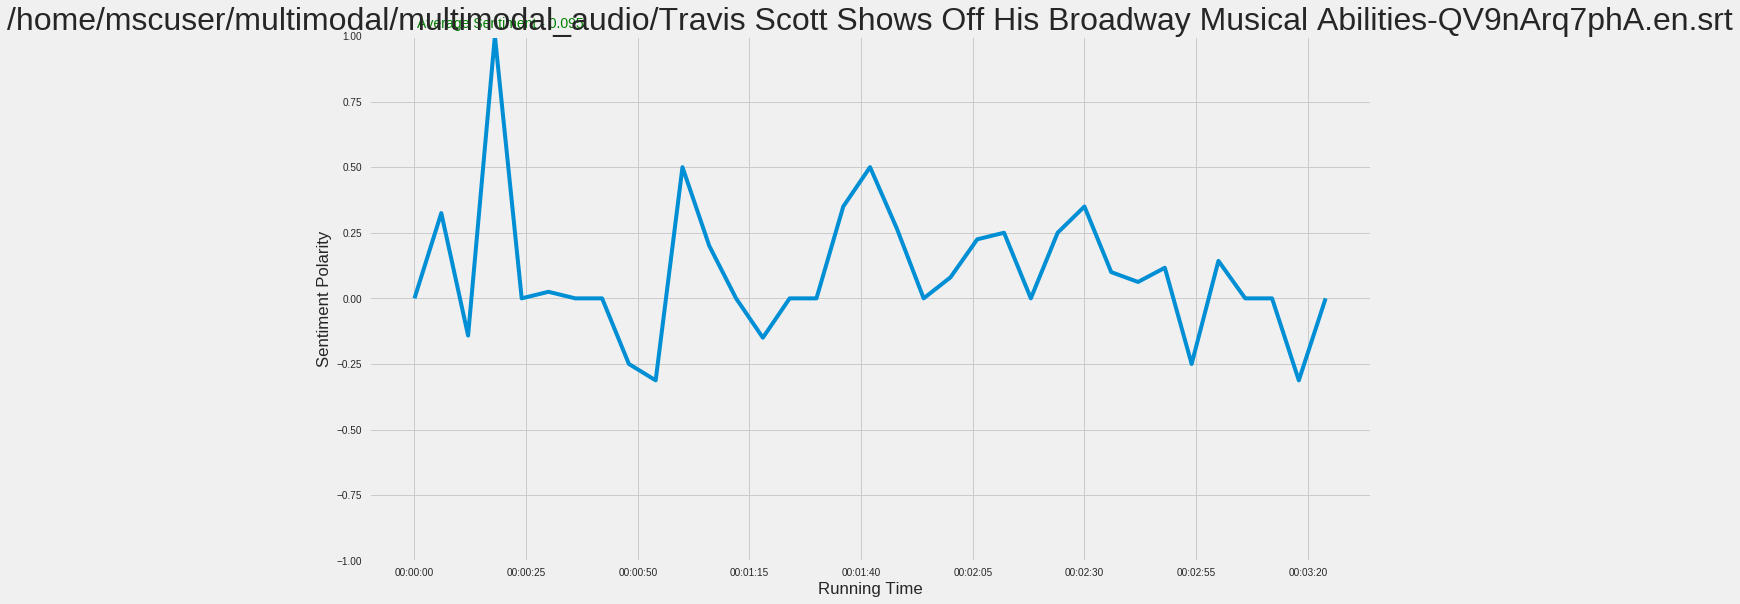

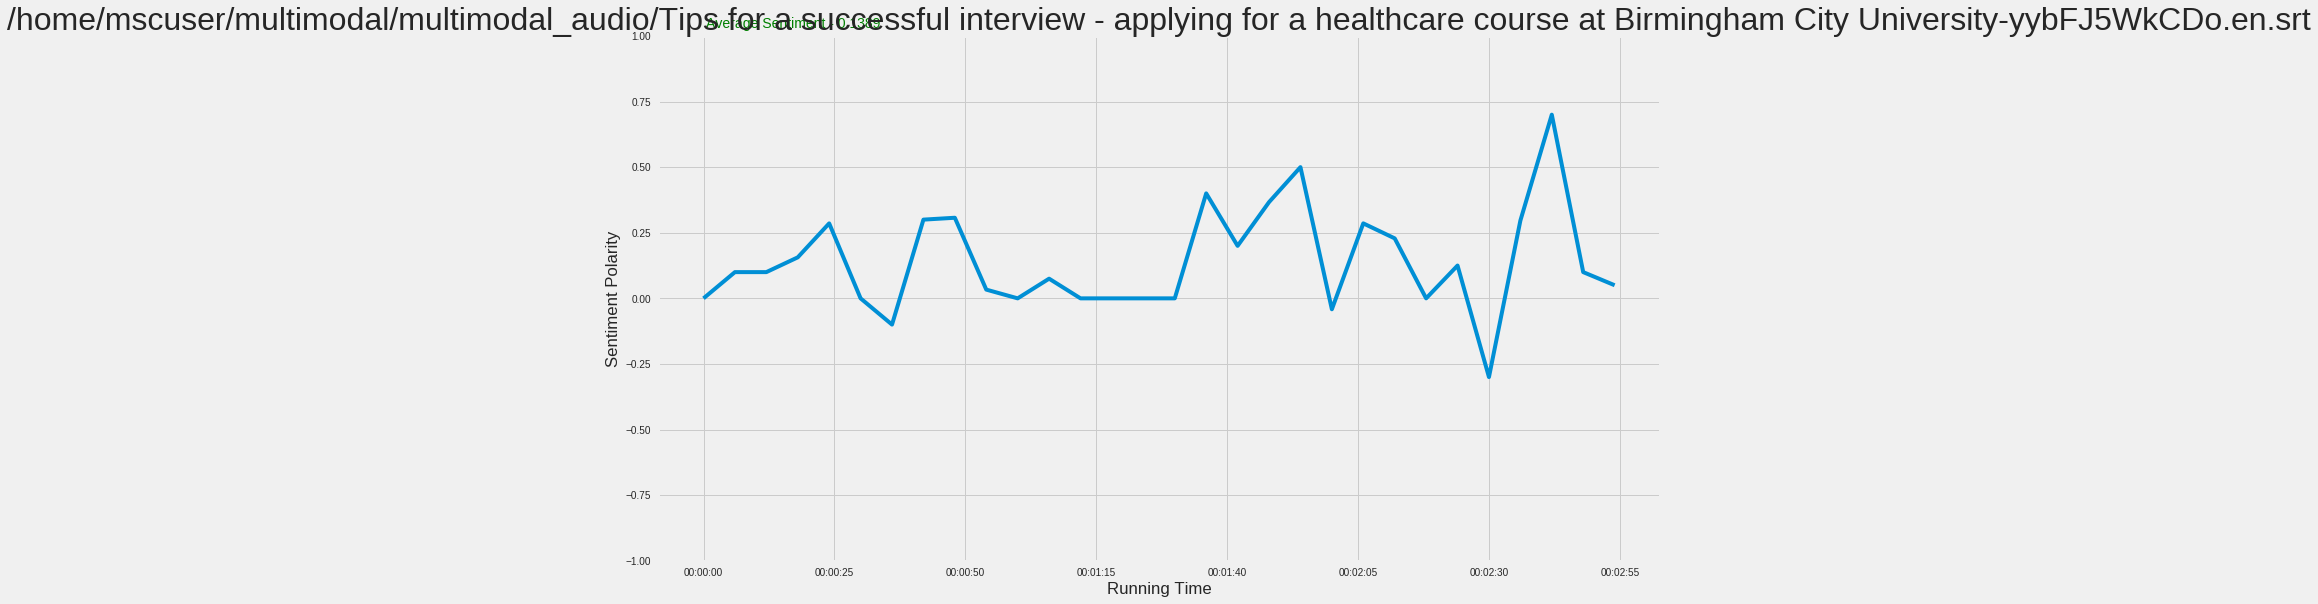

In [104]:
path = '/home/mscuser/multimodal/multimodal_audio'
walktree(path, sentiment)

In [11]:
print dict[0][2]

[0.0, 0.1, 0.1, 0.15625, 0.2857142857142857, 0.0, -0.10000000000000002, 0.3, 0.3071428571428571, 0.03333333333333333, 0.0, 0.07500000000000001, 0.0, 0.0, 0.0, 0.0, 0.4, 0.19999999999999998, 0.3666666666666667, 0.5, -0.041666666666666664, 0.2857142857142857, 0.22857142857142856, 0.0, 0.125, -0.3, 0.2963636363636364, 0.7, 0.10000000000000002, 0.05]


#    Find the mean of positives, negatives per movie and add it at them at teh existing dictionary

In [97]:
for i in range(len(dict)):
    #for earch movie
    positives=[]
    negatives=[]
    for j in range(len(dict[i][2])):
        if float(dict[i][2][j])>float(0):
            positives.append(dict[i][2][j])
        elif float(dict[i][2][j])<0:
            negatives.append(dict[i][2][j])
   
    
    dict[i]=dict[i] + (np.mean(positives),)
    dict[i]=dict[i] + (np.mean(negatives),)

In [99]:
print dict[0]

('/home/mscuser/multimodal/multimodal_audio/Tips for a successful interview - applying for a healthcare course at Birmingham City University-yybFJ5WkCDo.en.srt', [datetime.time(0, 0), datetime.time(0, 0, 6), datetime.time(0, 0, 12), datetime.time(0, 0, 18), datetime.time(0, 0, 24), datetime.time(0, 0, 30), datetime.time(0, 0, 36), datetime.time(0, 0, 42), datetime.time(0, 0, 48), datetime.time(0, 0, 54), datetime.time(0, 1), datetime.time(0, 1, 6), datetime.time(0, 1, 12), datetime.time(0, 1, 18), datetime.time(0, 1, 24), datetime.time(0, 1, 30), datetime.time(0, 1, 36), datetime.time(0, 1, 42), datetime.time(0, 1, 48), datetime.time(0, 1, 54), datetime.time(0, 2), datetime.time(0, 2, 6), datetime.time(0, 2, 12), datetime.time(0, 2, 18), datetime.time(0, 2, 24), datetime.time(0, 2, 30), datetime.time(0, 2, 36), datetime.time(0, 2, 42), datetime.time(0, 2, 48), datetime.time(0, 2, 54)], [0.0, 0.1, 0.1, 0.15625, 0.2857142857142857, 0.0, -0.10000000000000002, 0.3, 0.3071428571428571, 0.03